1. DATA DESCRIPTION:

In the players.csv dataset, there are 1,372 observations (196 rows and 7 columns).

There are 7 variables:
- "experience" (chr) indicates the amount of experience each player has playing the Minecraft game.
- "subscribe" (lgl) tells if the players are subscribed to a game-related newsletter.
- "hashedEmail" (chr) shows the emails of the players, but encrypted (hashed).
- "played_hours" (dbl) indicates the number of hours each player spent on the game.
- "name" (chr) lists the names of the players.
- "gender" (chr) lists the sex of the players.
- "Age" (dbl) lists the age of the players.
- An issue is that the data table is not tidy; the "experience", "subscribe" and "gender" columns all contain more than one variable, which can be fixed by wrangling with the pivot_wider function.
- The "played_hours" and "Age" columns should have their variables arranged in descending order (from largest to smallest) with the arrange(by=desc) function.
  
In the sessions.csv dataset, there are 7,675 observations (1535 columns and 5 rows).

There are 5 variables:
- "hashedEmail" (chr) again shows the encrypted (hashed) emails of the players .
- "start_time" (chr) tells the time the players started playing the game.
- "end_time" (chr) tells the time the players stopped playing the game.
- "original_start_time" (dbl) states the numerical start time relative to the unix epoch time (January 1st, 1970)
- "original_end_time" (dbl) states the numerical end time relative to the unix epoch time (January 1st, 1970)
- Issues: the "original_start_time" and "original_end_time" variables are difficult to interpret without context; timing the original start and end times relative to the unix epoch time is a redundant task, as both do not change at all within each value in a direct comparison. Moreover, no units are provided so there is nothing to quantify the observation.

2. Questions

Broad: What player characteristics and behaviours are most predictive of a user subscribing to the game-related newsletter, and how do these variables change amongst different player types (experience level)?

Specific: Can the number of hours played predict whether a player is subscribed to a game-related newsletter in the "players.csv" file?

Method: The data will help me address the question of interest with the "Age" and "played_hours" variables being the predictors, to classify the "subscribe" variable. Before I can apply one of the predictive methods, I need to wrangle the data to make sure that it is tidy, and put the data in the recipe function to standardize the variables.

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


subscribe,played_hours,Age
<lgl>,<dbl>,<dbl>
TRUE,30.3,9
TRUE,3.8,17
FALSE,0.0,17
TRUE,0.7,21
TRUE,0.1,21
TRUE,0.0,17
TRUE,0.0,19
FALSE,0.0,21
TRUE,0.1,17


average_played_hours,average_age
<dbl>,<dbl>
5.845918,20.52062


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


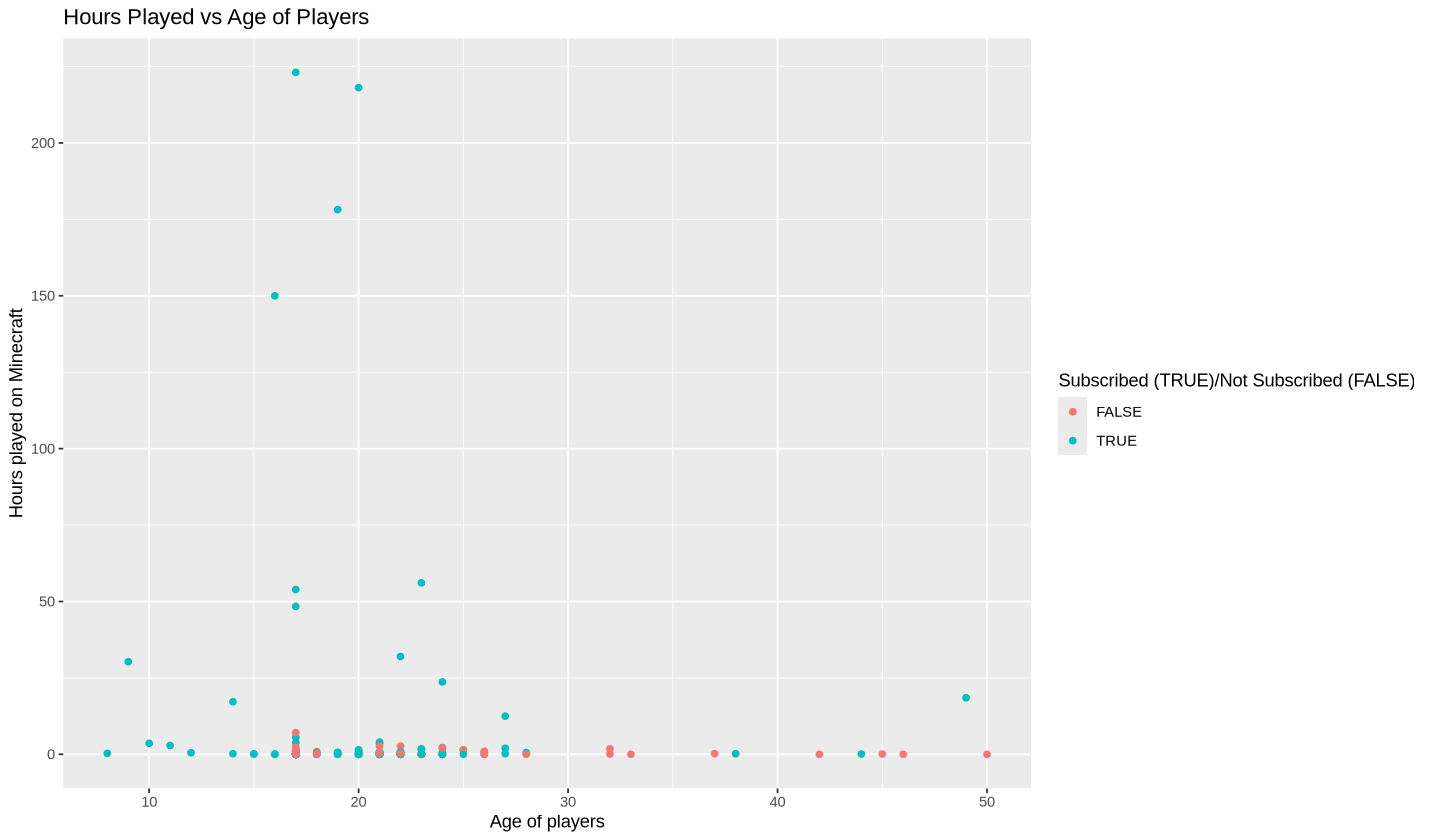

In [2]:
set.seed(1234)
library(tidyverse)

players<-read_csv("players.csv")
players_tidy<-players|>
    select(subscribe, played_hours, Age)
    # arrange(desc(played_hours))
players_tidy

players_mean <- players_tidy|>
    summarize(average_played_hours = mean(played_hours, na.rm=TRUE),
              average_age=mean(Age, na.rm=TRUE))
players_mean

options(repr.plot.width = 12, repr.plot.height = 7)
players_plot<-players_tidy|>
    ggplot(aes(x=Age, y=played_hours, colour=subscribe))+
    geom_point()+
    labs(x="Age of players", 
         y="Hours played on Minecraft", 
         title="Hours Played vs Age of Players", 
         color="Subscribed (TRUE)/Not Subscribed (FALSE)")
players_plot

sessions<-read_csv("sessions.csv")

4. Methods and plan

The method used will be the K-nearest neighbors classification algorithm, given that the predictee is a categorical, not quantitative variable. The K-nearest neighbors classifier finds the K “nearest” or “most similar” observations in the training set; then, it uses their diagnosis to make a prediction for the new observation’s diagnosis. A limitation of this algorithm is imbalanced class weightings. If one class is more frequent than another, KNN tends to favour the majority class. This limitation can be resolved by standardizing the variables, which makes it so that all features contribute equally to a distance-based algorithms like KNN. To compare/select the model, the predictors used to classify the "subscribe" variable are "Age" and "played_hours"; the metrics used to compare are accuracy, precision and recall. For pre-processing, the data will be initially split in 75% and 25% proportions (training and testing data respectively). Splitting the data should occur first, before standardizing. Cross validation will be used over a validation set.